- いろいろあってるか確認

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.concatenate(
    [np.random.normal(0.7, 0.05, 300), 
     np.random.normal(1.5, 0.05, 300),
     np.random.normal(0.6, 0.05, 300),
     np.random.normal(1.3, 0.05, 300)])
data2 = np.concatenate(
    [np.random.normal(0.7+1, 0.05, 300), 
     np.random.normal(1.5+1, 0.05, 300),
     np.random.normal(0.6+1, 0.05, 300),
     np.random.normal(1.3+1, 0.05, 300)])

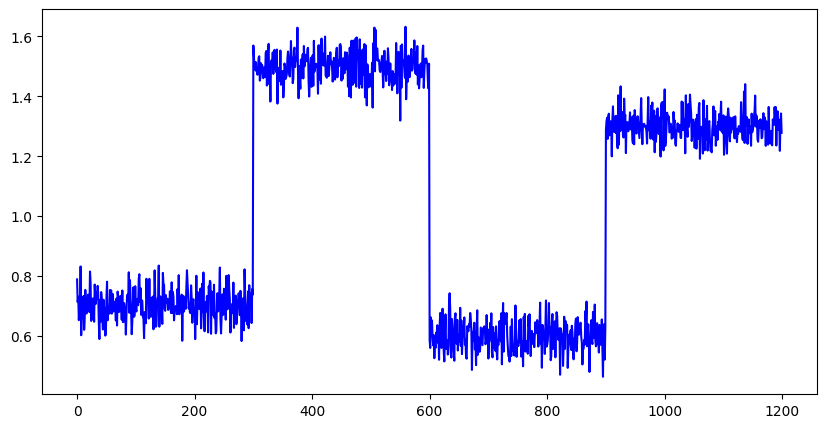

In [4]:
fig,ax = plt.subplots(1,1,figsize=(10,5))

ax.plot(range(len(data)),data,color="blue")


## change finder 試し打ち

In [4]:
import changefinder

In [5]:
cf = changefinder.ChangeFinder(r=0.01, order=1, smooth=7)
result = np.empty(data.shape)

for i,d in enumerate(data):
    a = cf.update(d)
    result[i] = cf.update(d)

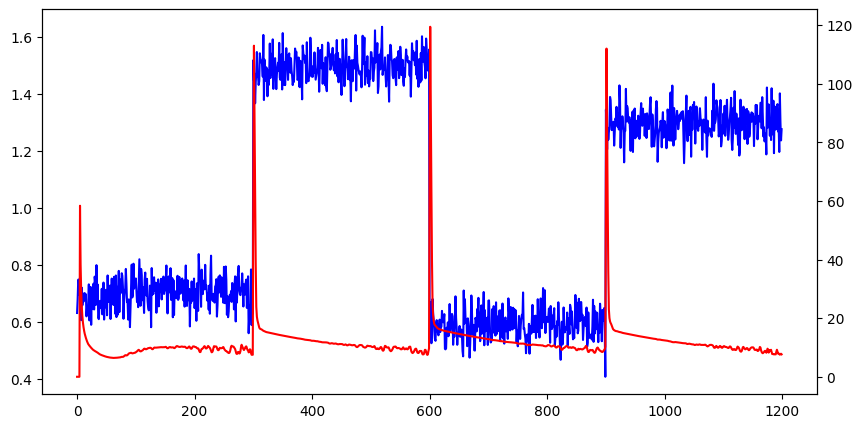

In [6]:
fig,ax = plt.subplots(1,1,figsize=(10,5))

ax.plot(range(len(data)),data,color="blue")
ax2 = ax.twinx()
ax2.plot(range(len(data)),result,color="red")

## 部分空間法　試し打ち

In [7]:
class subspace_approach:
    
    def __init__(self,Data,window_range):

        self.Data = np.array(Data)
        self.window_range = window_range
        
    def TrajetoryMatrix_X(self,first_start,final_start):
        
        return np.array([self.Data[i:i+self.window_range] for i in range(first_start,final_start+1)])
    
    
def gyaku_sqrt(X):
    return scipy.linalg.sqrtm(np.linalg.inv(X))

In [8]:
def gyaku_sqrt(X):
    return scipy.linalg.sqrtm(np.linalg.inv(X))

In [16]:
from sklearn.decomposition import TruncatedSVD
import scipy

result = []

# データのとり方パラメータ
# traje_pattern_r = 5
# test_pattern_m = 5
# lag_L = 45
# windw_M = 30

traje_pattern_r = 2
lag_L = 30
windw_M = 30


# 対象データ
target_data = data

for t in list(range(lag_L+3*windw_M,len(target_data)-2*windw_M)):

    subspace = subspace_approach(target_data,windw_M)
    
    ########## Yp Yf Z の設定
    
    Yp_t = subspace.TrajetoryMatrix_X(t-3*windw_M-lag_L,t-2*windw_M)
    Yf_t = subspace.TrajetoryMatrix_X(t-2*windw_M-lag_L,t-windw_M)
#     Z_t = subspace.TrajetoryMatrix_X(t-windw_M,t)
    Z_t = subspace.TrajetoryMatrix_X(t-windw_M,t+windw_M+lag_L)
    
    ######### Yp Yfから共分散を導出
    
    Sigmapp = 1/(windw_M-1)* np.dot(Yp_t.T,Yp_t)
    Sigmafp = 1/(windw_M-1)* np.dot(Yf_t.T,Yp_t)
    Sigmaff = 1/(windw_M-1)* np.dot(Yf_t.T,Yf_t)
    
    ######### 共分散から U_1 S_1　を導出
    
    o_t = np.dot(gyaku_sqrt(Sigmaff).T,Sigmafp)
    o_t = np.dot(o_t,gyaku_sqrt(Sigmapp))

    U_t, S_diags, V_t = scipy.linalg.svd(o_t)
    U_r_t = U_t[:traje_pattern_r]
    S_r_t = np.diag(S_diags[:traje_pattern_r])
    
    #########  U_1 S_1 から O　をどうにゅつ
    
    O_t = np.dot(scipy.linalg.sqrtm(Sigmaff).T,U_r_t.T)
    O_t = np.dot(O_t,scipy.linalg.sqrtm(S_r_t).T)
    
    ######### Oの特異値分解から Uを導出
    
    U,S,V = scipy.linalg.svd(O_t)
    
    ########### Dの導出
    
    D = sum([np.dot(z,z.T)-np.dot(np.dot(z,U.T),np.dot(U,z.T)) for z in Z_t])
    
    ########### Dの正規化
    D_NomralizeConst = sum([np.dot(y,y.T)-np.dot(np.dot(y,U.T),np.dot(U,y.T))for y in Yf_t])
    D_normalize = D/D_NomralizeConst
    
    ########### 結果の保存
    
    result.append(D_normalize)

######### 表示

    
fig,ax = plt.subplots()

ax.plot(range(lag_L+3*windw_M,len(target_data)-2*windw_M),result)
ax2 = ax.twinx()
ax2.plot(range(len(data)),data,color="red")

/usr/local/conda/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # Remove the CWD from sys.path while we load stuff.


ValueError: shapes (29,) and (30,30) not aligned: 29 (dim 0) != 30 (dim 0)

In [13]:
t = list(range(lag_L+3*windw_M,len(target_data)-2*windw_M))[np.array(result).argmax()]
print(t)

subspace = subspace_approach(target_data,windw_M)

Yp_t = subspace.TrajetoryMatrix_X(t-3*windw_M-lag_L,t-2*windw_M)
Yf_t = subspace.TrajetoryMatrix_X(t-2*windw_M-lag_L,t-windw_M)
Z_t = subspace.TrajetoryMatrix_X(t,t+windw_M)

889


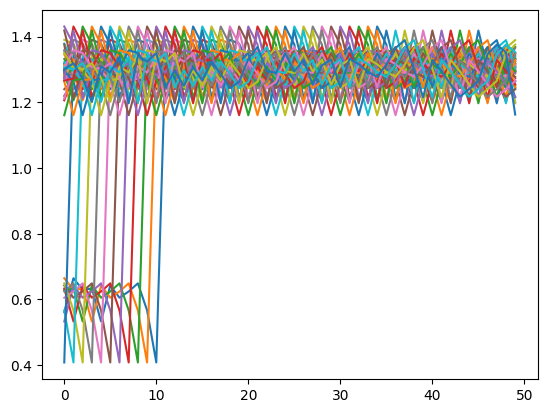

In [14]:
for d in Z_t:
    plt.plot(d)

## 部分空間法　ver2

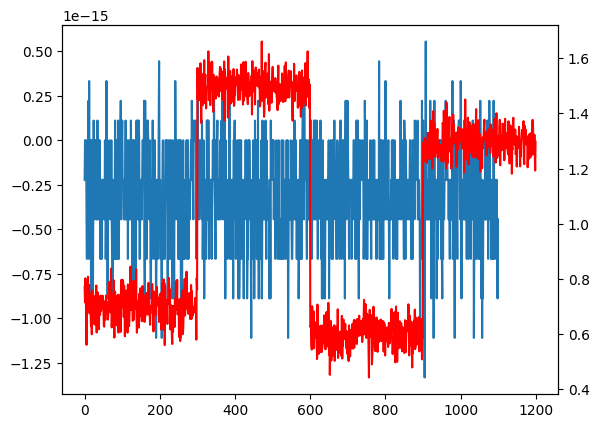

In [12]:
from sklearn.decomposition import TruncatedSVD
import scipy

result = []

#データのとり方に関するパラメータ
traje_pattern_r = 5
test_pattern_m = 5
lag_L = 10
windw_M = 30

#対象データ
target_data = data

for t in range(lag_L+2*windw_M,len(target_data)-windw_M):

    subspace = subspace_approach(target_data,windw_M)
    
    X_t = subspace.TrajetoryMatrix_X(t-windw_M-lag_L,t-windw_M)
    Z_t = subspace.TrajetoryMatrix_X(t-windw_M,t)

    U_t, S_diags, V_t = scipy.linalg.svd(X_t)
    U_r_t = U_t[:traje_pattern_r]

    Q_t, S_diags, V_t = scipy.linalg.svd(Z_t)
    Q_m_t = Q_t[:test_pattern_m]

    UQ = np.dot(U_r_t.T,Q_m_t)
    UQ_max = scipy.linalg.svd(UQ)[1][0]

    a_t = 1 - UQ_max

    result.append(a_t)
    
fig,ax = plt.subplots()

ax.plot(range(len(result)),result)
ax2 = ax.twinx()
ax2.plot(range(len(data)),data,color="red")

## 自作ChangeFineder

In [27]:
len(data_2d)

1200

In [13]:
data_2d = np.stack([data,data2]).T

In [ ]:
#from statsmodels.tsa.ar_model import AutoReg as AR
from statsmodels.tsa.vector_ar.var_model import VAR

start = 10
gosa = []
predicts = []
steps = 1


for t,d in enumerate(data_2d[start:]):
    t = t+start
    past_data = data_2d[:t]
    model = VAR(past_data)
    model_result = model.fit(maxlags=1)#aicにするとアウト
    result = model_result.forecast(past_data, steps=steps)
    predicts.append(result[0])
    gosa.append(sum(data_2d[t]-result[0]))

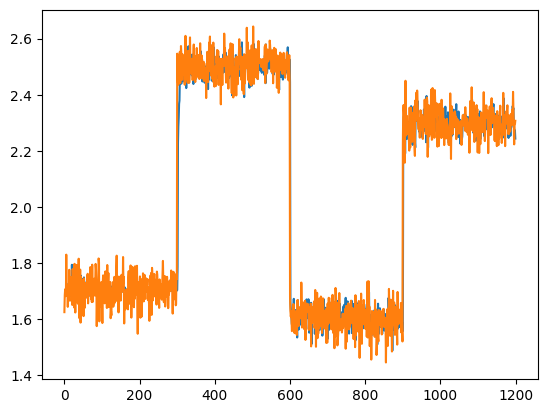

In [25]:
fig,ax = plt.subplots()

ax.plot(range(start,len(data_2d)),np.array(predicts).T[1])
ax.plot(range(len(data_2d)),data_2d.T[1])

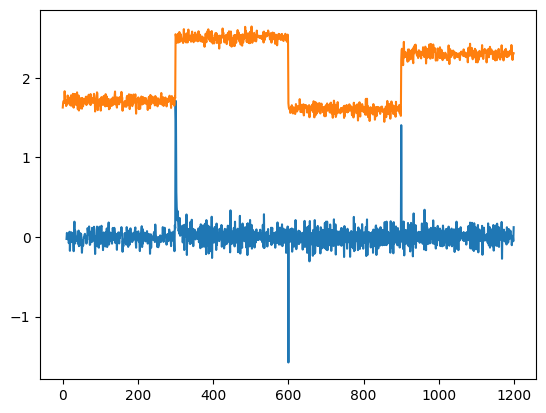

In [26]:
fig,ax = plt.subplots()

ax.plot(range(start,len(data_2d)),gosa)
ax.plot(range(len(data_2d)),data_2d.T[1])

## oned

In [31]:
from statsmodels.tsa.ar_model import AutoReg

start = 10
gosa = []
predicts = []
steps = 1


for t,d in enumerate(data[start:]):
    t = t+start
    past_data = data[:t]
    if len(past_data)>200:
        past_data = past_data[-200:]
    ar_model_lag1 = AutoReg(past_data, lags=1)
    # モデルの当てはめ
    ar_model_lag1 = ar_model_lag1.fit()
    # 予測
    result = ar_model_lag1.forecast(1)
    predicts.append(result)
    gosa.append(sum(data[t]-result))

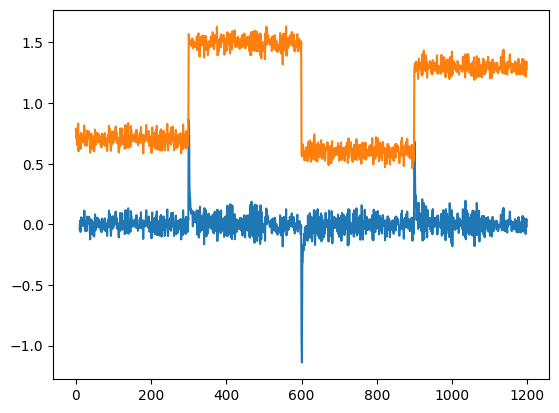

In [32]:
fig,ax = plt.subplots()

ax.plot(range(start,len(data)),gosa)
ax.plot(range(len(data)),data)

## Trend

In [5]:
import pandas as pd
# ライブラリーの読み込み
import pandas as pd
import numpy as np
from scipy import signal
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# データセットの読み込み
url='https://www.salesanalytics.co.jp/591h' #データセットのあるURL
df=pd.read_csv(url,                      #読み込むデータのURL
               index_col='Month',        #変数「Month」をインデックスに設定
               parse_dates=True)         #インデックスを日付型に設定
df.head() #確認



Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 13.1 µs


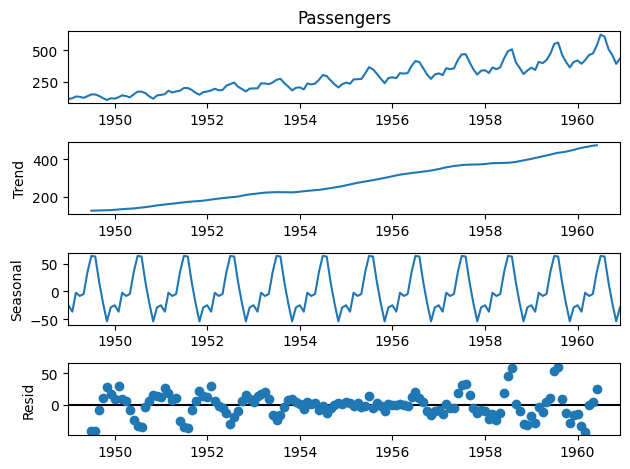

In [11]:
%time
# 成分分解
result=seasonal_decompose(df.Passengers, model='additive', period=12)
# グラフ化
result.plot()
plt.show()

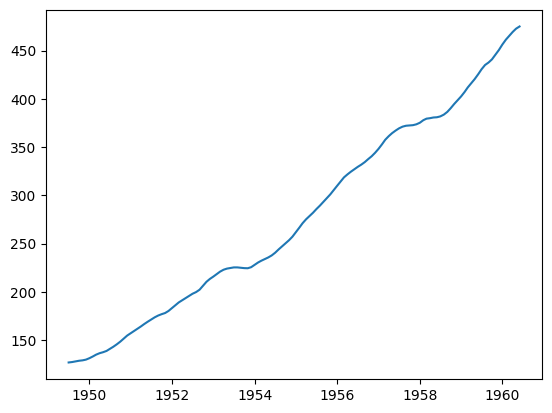

In [9]:
plt.plot(result.trend)

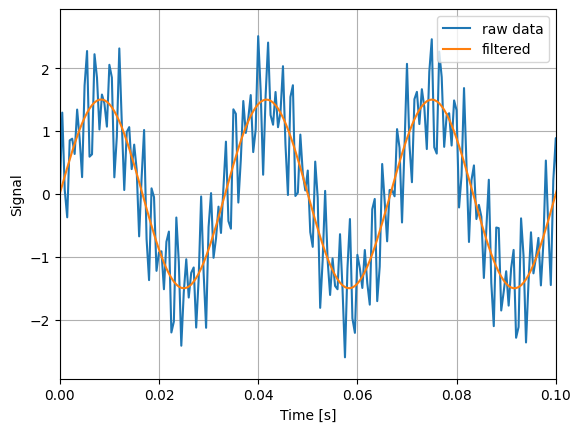

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


def butter_lowpass(lowcut, fs, order=4):
    '''バターワースローパスフィルタを設計する関数
    '''
    nyq = 0.5 * fs
    low = lowcut / nyq
    b, a = signal.butter(order, low, btype='low')
    return b, a


def butter_lowpass_filter(x, lowcut, fs, order=4):
    '''データにローパスフィルタをかける関数
    '''
    b, a = butter_lowpass(lowcut, fs, order=order)
    y = signal.filtfilt(b, a, x)
    return y


N = 1024            # サンプル数
dt = 0.0005          # サンプリング周期 [s]
fs = 1 / dt
f1, f2, f3 = 30, 432, 604    # 周波数 [Hz]

t = np.arange(0, N * dt, dt) # 時間 [s]
x = 1.5 * np.sin(2 * np.pi * f1 * t) \
    + 0.5 * np.sin(2 * np.pi * f2 * t) \
    + 0.7 * np.sin(2 * np.pi * f3 * t) # データ

y = butter_lowpass_filter(x, 100, fs, order=4)
fig, ax = plt.subplots()
ax.plot(t, x, label='raw data')
ax.plot(t, y, label='filtered')
ax.set_xlabel("Time [s]")
ax.set_ylabel("Signal")
ax.set_xlim([0, 0.1])
ax.grid()
plt.legend(loc='best')
plt.show()